<a href="https://colab.research.google.com/github/amnaahmad20/data-visualization-using-ggplot-plotnine/blob/main/Data_Visualization_using_plotnine_and_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the plotnine in colab notebook
# command to enter since colab doesnot have plotnine in it.
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#insttalling ggplot for visualization

!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.4 MB/s eta 0:00:00


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the libraries 

import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as pyplot
from matplotlib import font_manager as fmgr
from pandas.plotting import autocorrelation_plot

import plotnine
from plotnine import ggplot,geom_line,aes 

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

from datetime import datetime,timedelta




In [ ]:
# simple line graph of work vs income

#creating a list work_years
work_years = [1,2,3,4,5]
income = [11000,23405,6700,89000,789600]

df= pd.DataFrame({'years at work': work_years,'income': income})



In [ ]:
#testing our datframe

df.head()


,years at work,income
0,1,11000
1,2,23405
2,3,6700
3,4,89000
4,5,789600


In [ ]:
l_p = ggplot(data=df, mapping=aes(x='years at work', y='income'))


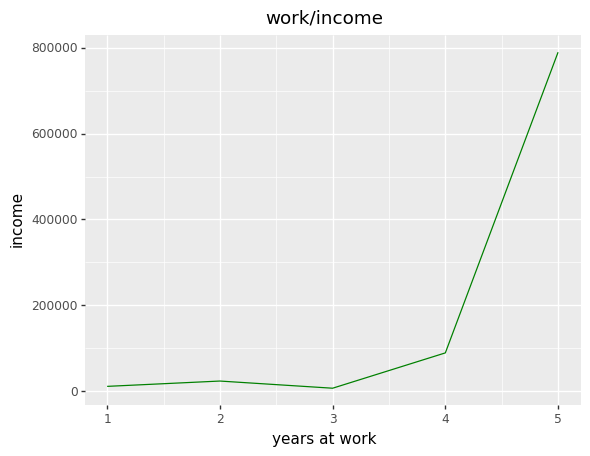

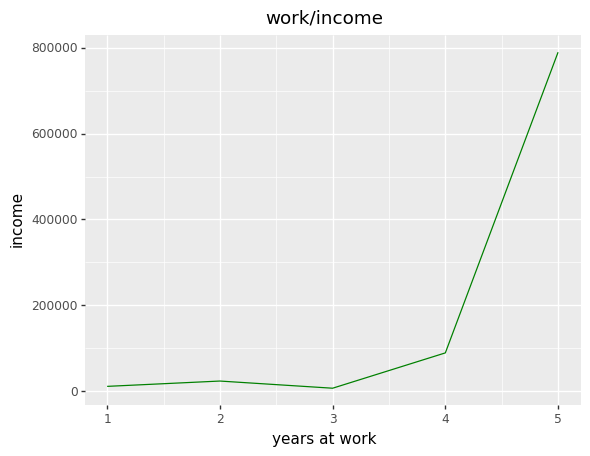

In [ ]:
(l_p + plotnine.geom_line(color='green')+plotnine.labs(title='work/income')).draw() 

In [ ]:
work_years = [1,2,3,4,5]

ML_eng_income =[12000,34000,67000,89000,65400]
SDE_income = [1000,2000,3000,4000,5000]

df_income= pd.DataFrame({'work years':work_years,'ML engg':ML_eng_income,'SDE':SDE_income})

In [ ]:
df_income.head()

,work years,ML engg,SDE
0,1,12000,1000
1,2,34000,2000
2,3,67000,3000
3,4,89000,4000
4,5,65400,5000


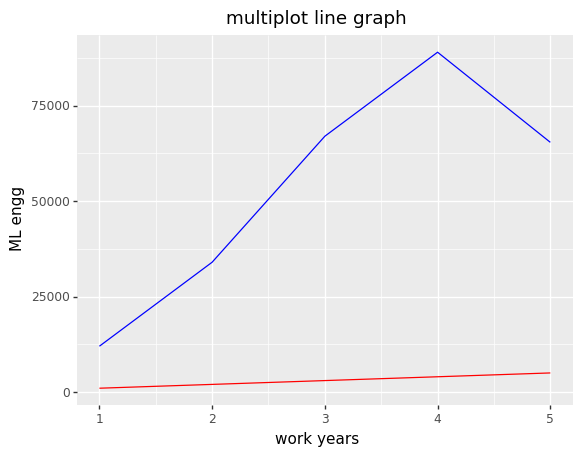

In [ ]:
(ggplot(aes(x='work years'), data=df_income) +\
    geom_line(aes(y='ML engg'), color='blue') +\
    geom_line(aes(y='SDE'), color='red') + plotnine.labs(title='multiplot line graph') + plotnine.scale_color_identity(name = 'legend',
                       breaks = ['blue', 'red'],
                       labels = ["ML engg", "SDE"],
                       guide = 'legend')).draw();

In [32]:
#bar plot using ggplot

#loading dataset using sns.load_dataset
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


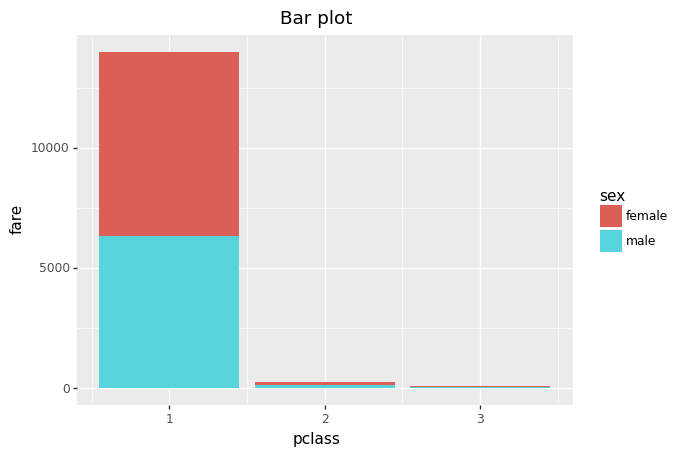

<ggplot: (8789461125431)>

In [ ]:
(plotnine.ggplot(data=df.dropna(), mapping=aes(x='pclass', y='fare', fill="sex"))+
plotnine.geom_col()+
plotnine.labs(title="Bar plot"))


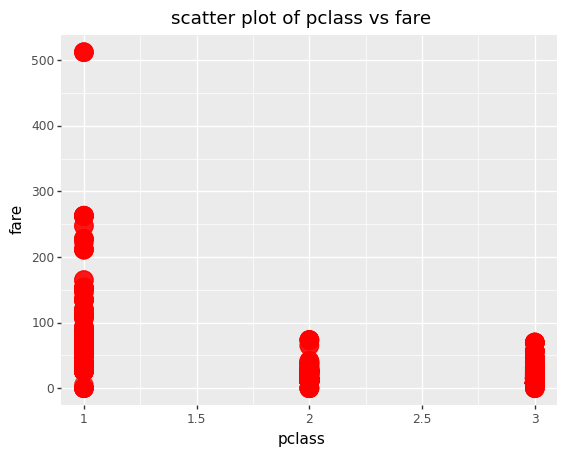

<ggplot: (8789457632205)>

In [36]:
#scatter plot using ggplot

scatter_plot = ggplot(data=df, mapping=aes(x='pclass', y='fare'))

(scatter_plot+ 
plotnine.labs(title="scatter plot of pclass vs fare") +
plotnine.geom_point(shape='o',size=7, color='red', alpha=0.7))

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


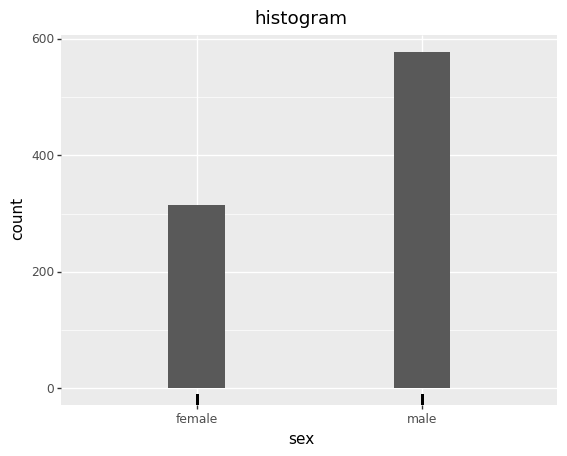

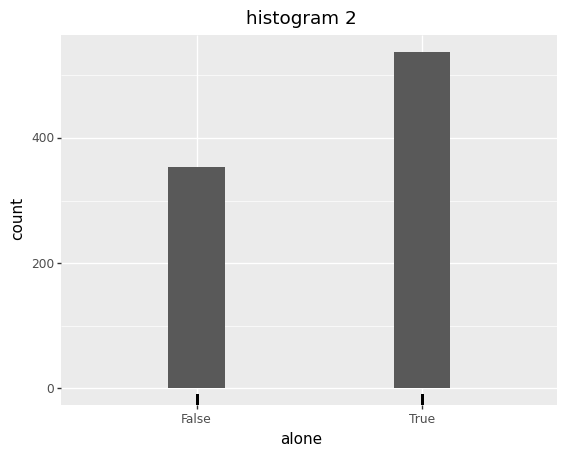

<ggplot: (8789457095909)>

In [45]:
#histogram to show frequency distribution 
# number of observations in each given interval 

hist= ggplot(data=df,mapping=aes(x='sex'))

(hist +
plotnine.labs(title='histogram')+
plotnine.geom_histogram()+
plotnine.geom_rug()).draw()

hist= ggplot(data=df,mapping=aes(x='alone'))

(hist +
plotnine.labs(title='histogram 2')+
plotnine.geom_histogram()+
plotnine.geom_rug())

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


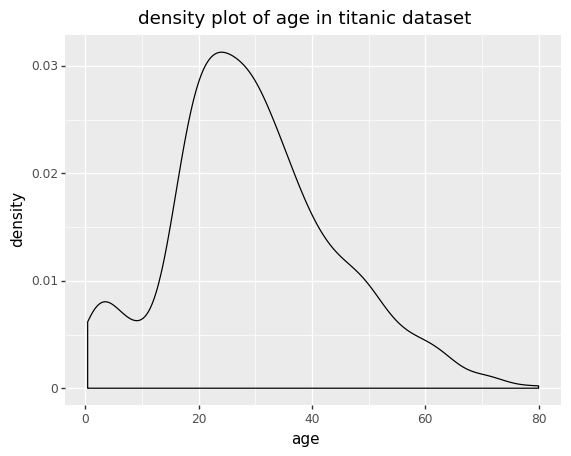

<ggplot: (8789457011447)>

In [48]:
# for continous interval use density plot

kde= ggplot(data=df,mapping=aes('age'))


(kde + 
plotnine.geom_density()+
plotnine.labs(title='density plot of age in titanic dataset'))

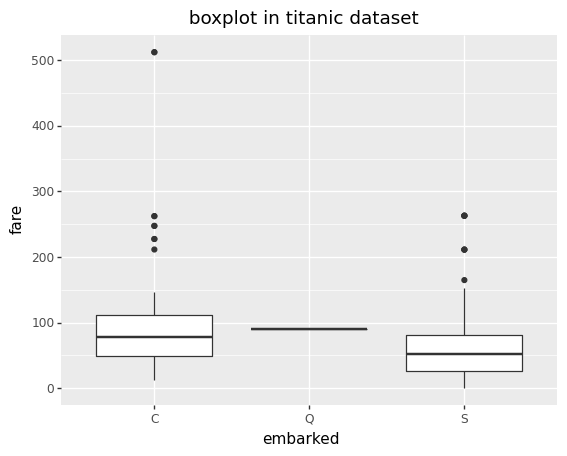

<ggplot: (8789456948423)>

In [50]:
bp= ggplot(data=df.dropna(), mapping=aes(x='embarked', y='fare'))

(bp + 
plotnine.geom_boxplot()+
plotnine.labs(title=' boxplot in titanic dataset'))

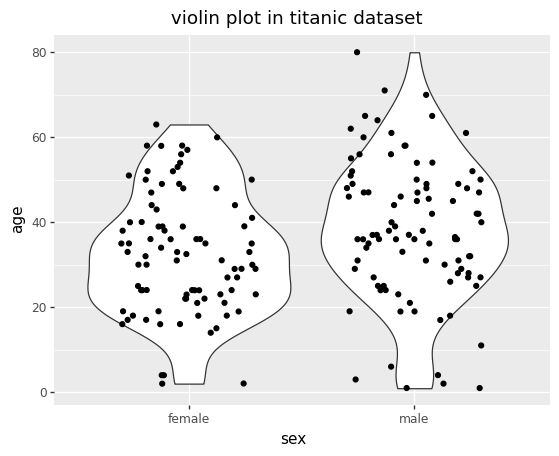

<ggplot: (8789456846827)>

In [53]:
vp= ggplot(data=df.dropna(), mapping=aes(x='sex', y='age'))

(vp + 
plotnine.geom_violin()+
plotnine.labs(title=' violin plot in titanic dataset')+
 plotnine.geom_jitter(position=plotnine.position_jitter(0.3)))